# UTS - Pengolahan Data Sistem Fisis
## Nama : Deni Ramdani
## NIM : 20222011

In [1]:
# import libraries
from scipy.io import wavfile
import os

from scipy.fft import rfft, rfftfreq
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
plt.rcParams['figure.figsize'] = [10,4]
plt.rcParams.update({'font.size' : 18})

### 4. Unduh berkas WAV
a. Tuliskan ukuran berkas.

b. Tuliskan durasi audio yang tersimpan pada berkas.

c. Tuliskan sample rate berkas audio yang tersimpan pada berkas.

d. Lakukan FFT 1-D untuk dengan rfft dari scipy.fft dan tentukan frekuensi-frekuensinya.

e. Sarikan semua langkah yang dilakukan beserta hasilnya sesuai dengan petunjuk di
https://github.com/dudung/fi6004-01-2022-2/issues/4.


In [3]:
aud_filename = 'note_08_20222011.wav' #Define Filename
sample_rate, aud_file = wavfile.read(aud_filename) #Read .wav file
Nsample = len(aud_file)
aud_filesize = os.path.getsize(aud_filename) #Get audio filesize
time_duration = len(aud_file)/sample_rate

Number of samples $N_s$:
\begin{equation}
    N_s = f_s \Delta t_s \\
    \Rightarrow \Delta t_s = \frac{N_s}{f_s} 
\end{equation}

with $f_s$ is sampling rate, $\Delta t_s$ is duration of sampling 

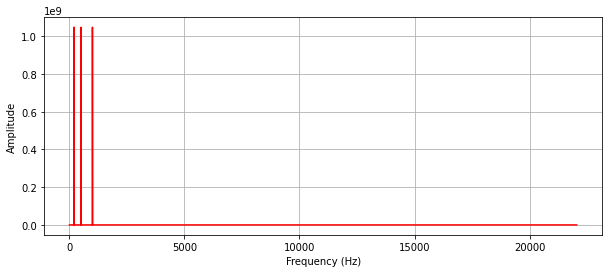

In [4]:
yf = rfft(aud_file)
xf = rfftfreq(Nsample, 1.0/sample_rate)

# plot signal in freqency domain
plt.figure(figsize=(10, 4))
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.plot(xf, np.abs(yf), 'r-')
plt.show()

In [5]:
#Define Frequency
frequency = []
for i in range(len(yf)):
    if np.abs(yf[i]) > 1e9:
        frequency.append(xf[i])

File size, time duration, sample rate, and frequency after FFT

In [6]:
print("File size : " + str(aud_filesize/1000) + "kB")
print("Time duration : " + str(time_duration) + " s")
print("Sample rate : " + str(sample_rate))
print("Frequency : " + str(frequency) + " Hz")

File size : 352.844kB
Time duration : 4.0 s
Sample rate : 44100
Frequency : [200.0, 500.0, 1000.0] Hz


### 5. Unduh berkas PNG.
a. Tuliskan ukuran berkas.

b. Tuliskan ukuran citra yang tersimpan dalam berkas.

c. Tuliskan format pixel citra yang tersimpan dalam berkas.

d. Lakukan FFT 2-D dengan ifftshift dan fft2 dari numpy.fft dan tentukan frekuensi-frekuensinya.

e. Sarikan semua langkah yang dilakukan beserta hasilnya sesuai dengan petunjuk di

https://github.com/dudung/fi6004-01-2022-2/issues/4

In [7]:
img_filename = "20222011.png" #Image filename
img_file = Image.open(img_filename) #Read image
img_filesize = os.path.getsize(img_filename) #Get file size image
pixel_format = img_file.mode #Get pixel format
img_size = img_file.size #Get image size

In [8]:
img_arr = np.array(img_file) # Converting image file to array

#Calculate Fourier Transform Image
imgt = np.fft.ifftshift(img_arr)
imgt = np.fft.fft2(imgt)
imgt = np.fft.fftshift(imgt)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


File size :  7082
Image size : 100x100px
Pixel format :  RGBA


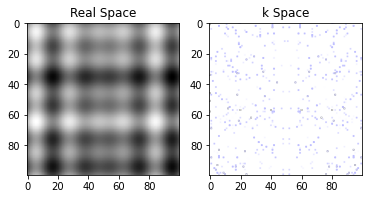

In [9]:
#Showing image in real space and k-space
plt.subplot(121)
plt.imshow(abs(img_arr))
plt.title("Real Space")

plt.subplot(122)
plt.imshow(abs(imgt))
plt.title("k Space")

print("File size : ",img_filesize)
print("Image size : " + str(img_size[0]) + "x" + str(img_size[1]) + "px")
print("Pixel format : ",pixel_format)

plt.show()